1. Distribuzione delle Etichette

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utility import Dataset

df = pd.read_csv(f'KDDTrain+.txt', header=None)
df_test = pd.read_csv(f'KDDTest+.txt', header=None)

columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'label', 'score']
df.columns = columns
df_test.columns = columns

# df = Dataset(df)

nominal_features = ['protocol_type', 'service', 'flag']
binary_features = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
numeric_features = [feature for feature in columns if feature not in nominal_features + binary_features + ['label', 'score']]

# stampa il numero di valori unici della classe label
print(df['label'].nunique())
print(df_test['label'].nunique())
print(df['label'].value_counts())
print(df_test['label'].value_counts())


# plt.figure(figsize=(10, 6))
# sns.countplot(x='label', data=df, order = df['label'].value_counts().index)
# plt.xlabel(f'labels')
# for i in range(len(df['label'].value_counts())):
#     plt.text(i, df['label'].value_counts()[i], df['label'].value_counts()[i], ha = 'center')
# plt.title('Distribuzione delle etichette')
# plt.show()

23
38
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunne

2. Distribuzione feature

KeyboardInterrupt: 

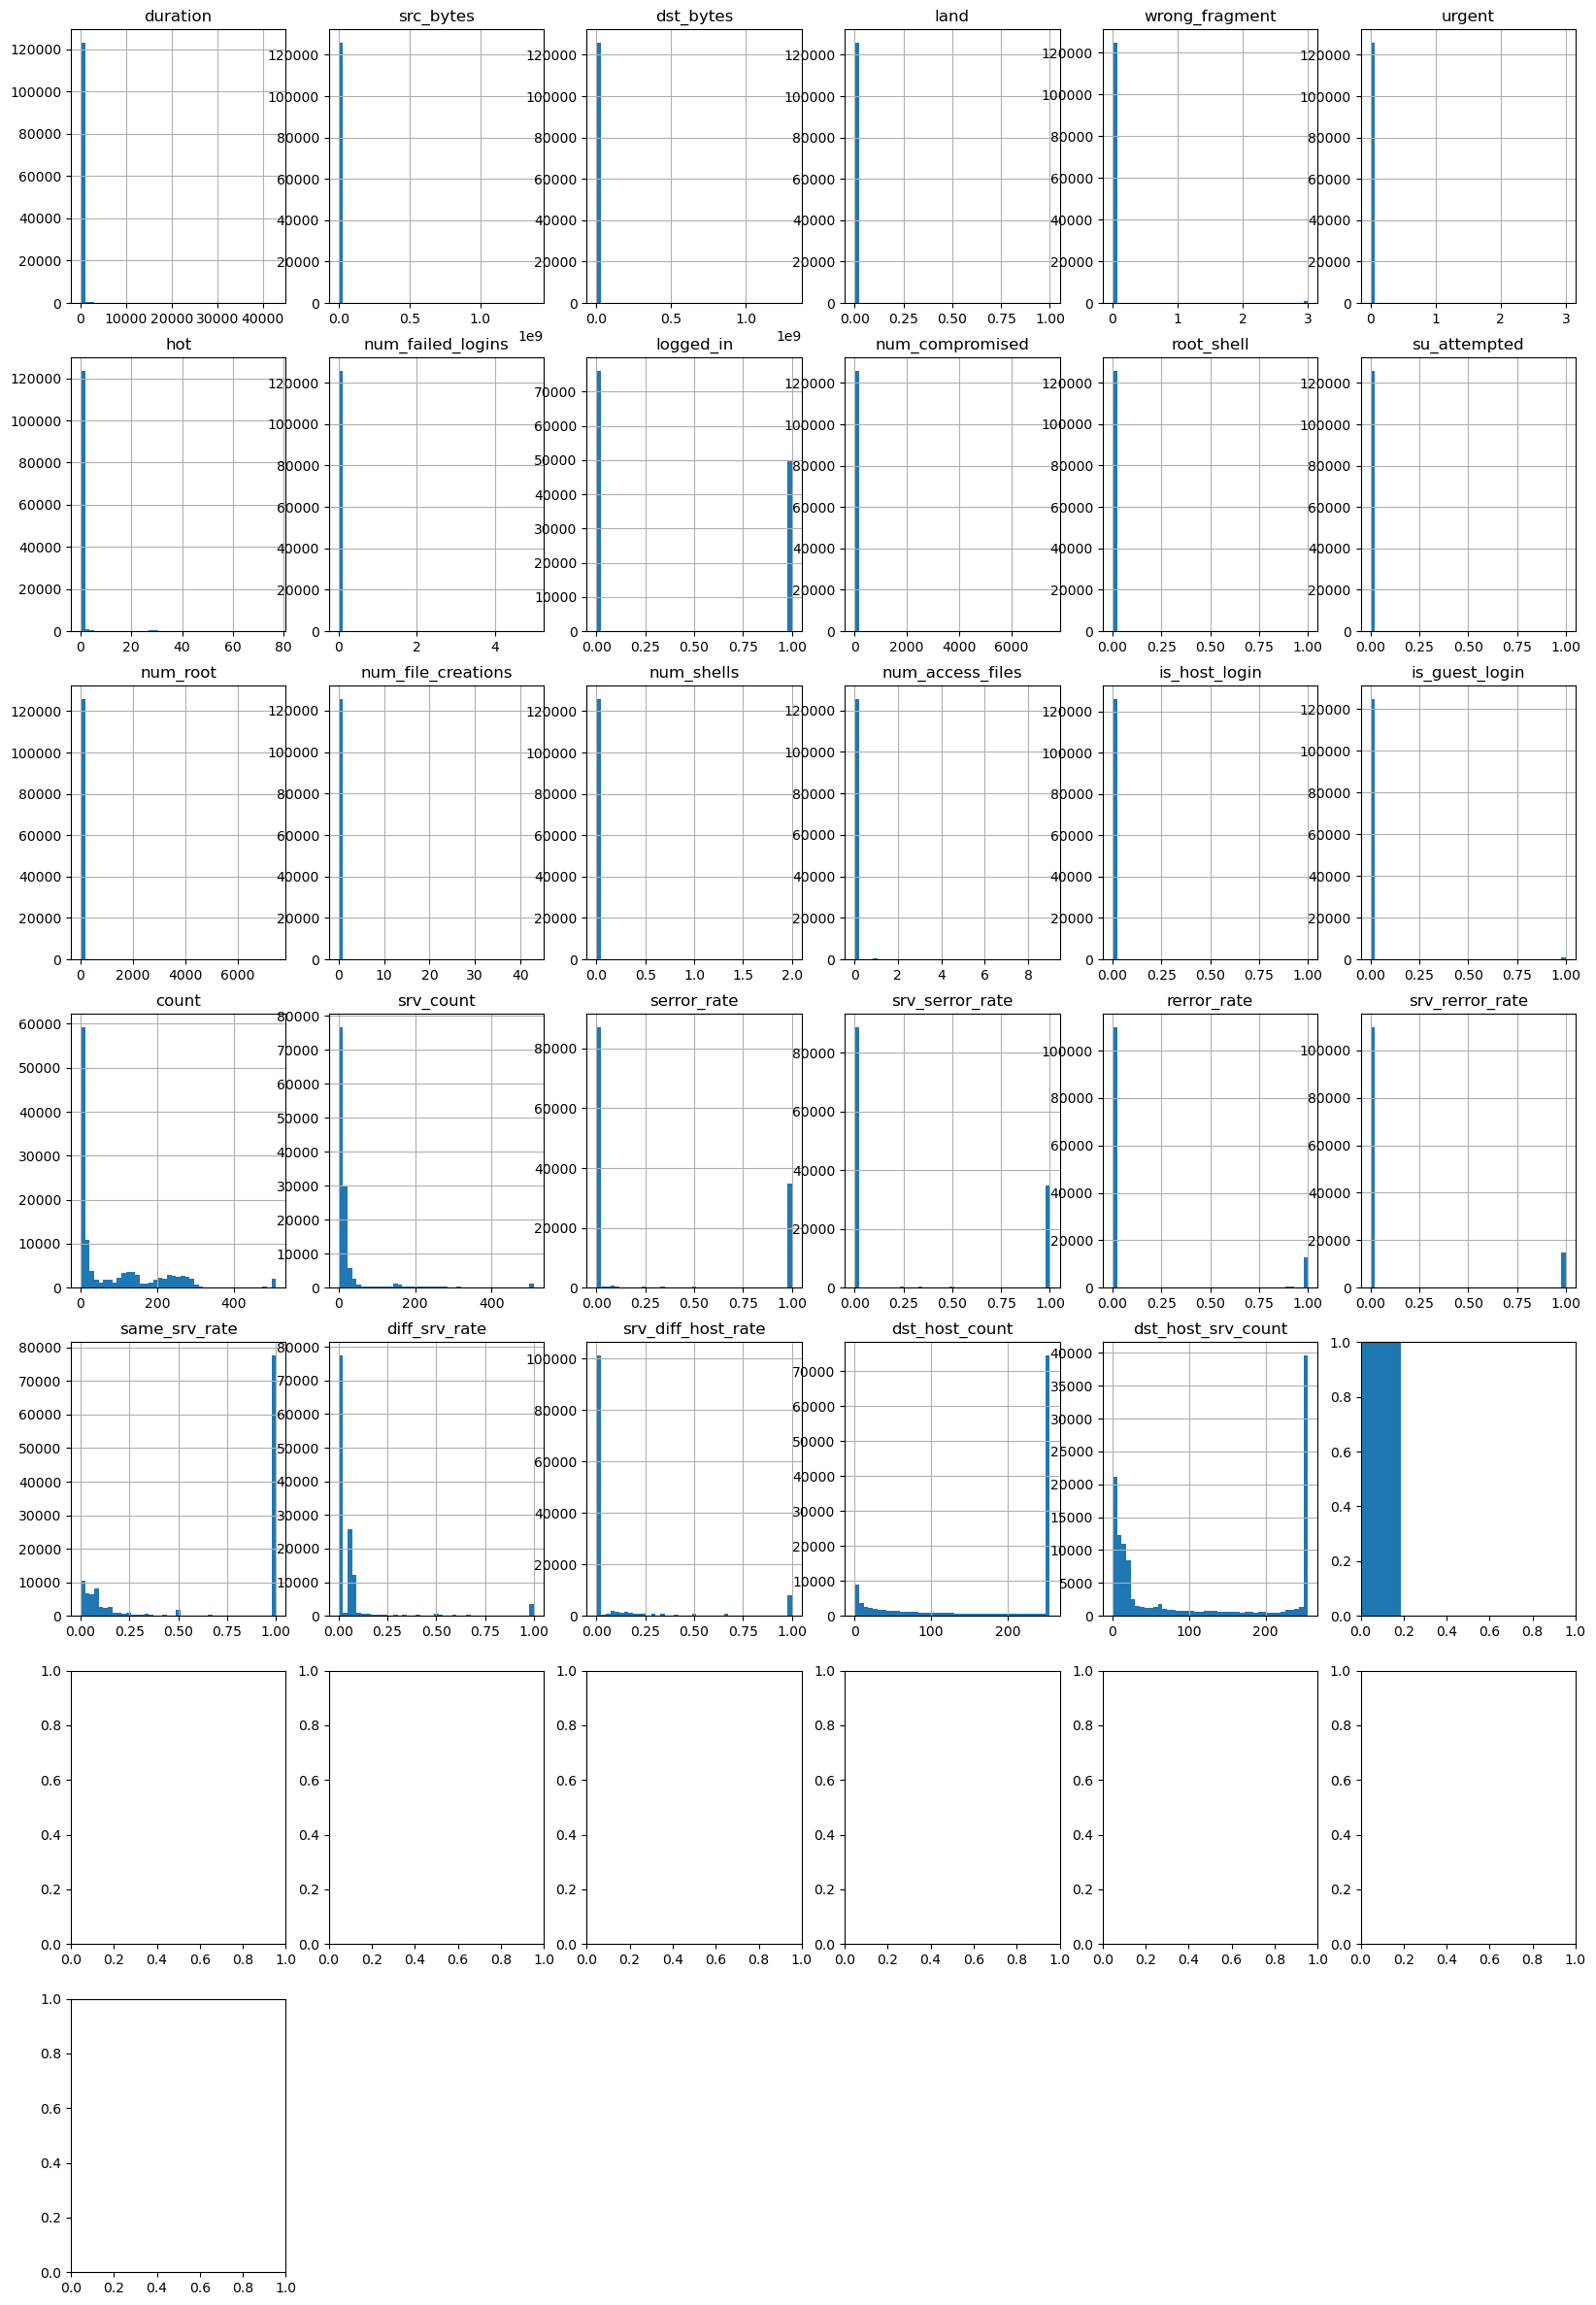

In [25]:
df.hist(bins=43, figsize=(20, 30))

3. Protocol type

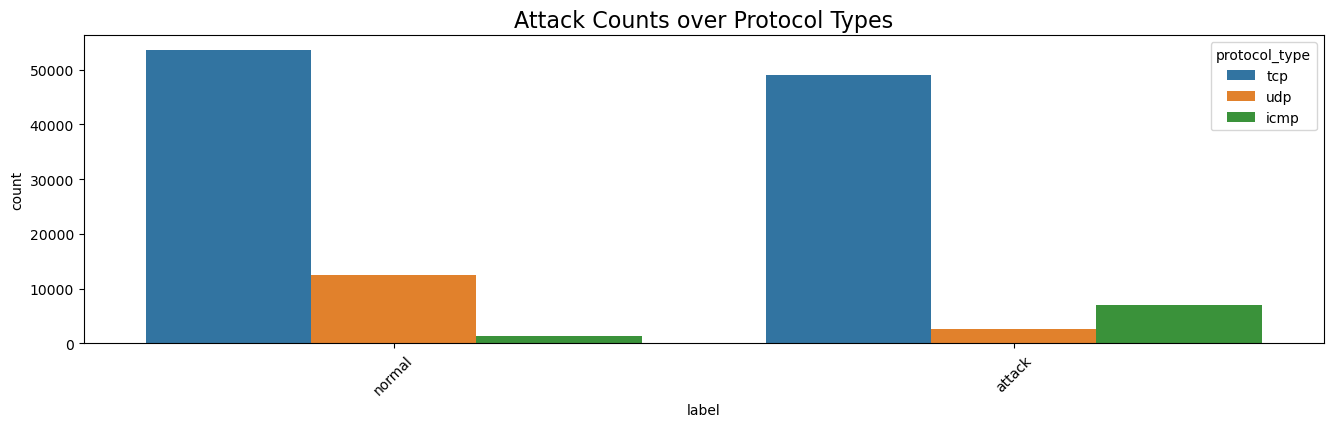

tcp     0.815167
udp     0.119018
icmp    0.065816
Name: protocol_type, dtype: float64

In [8]:
plt.figure(figsize=(16,4))
sns.countplot(x='label',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

df["protocol_type"].value_counts(normalize=True)

4. Service

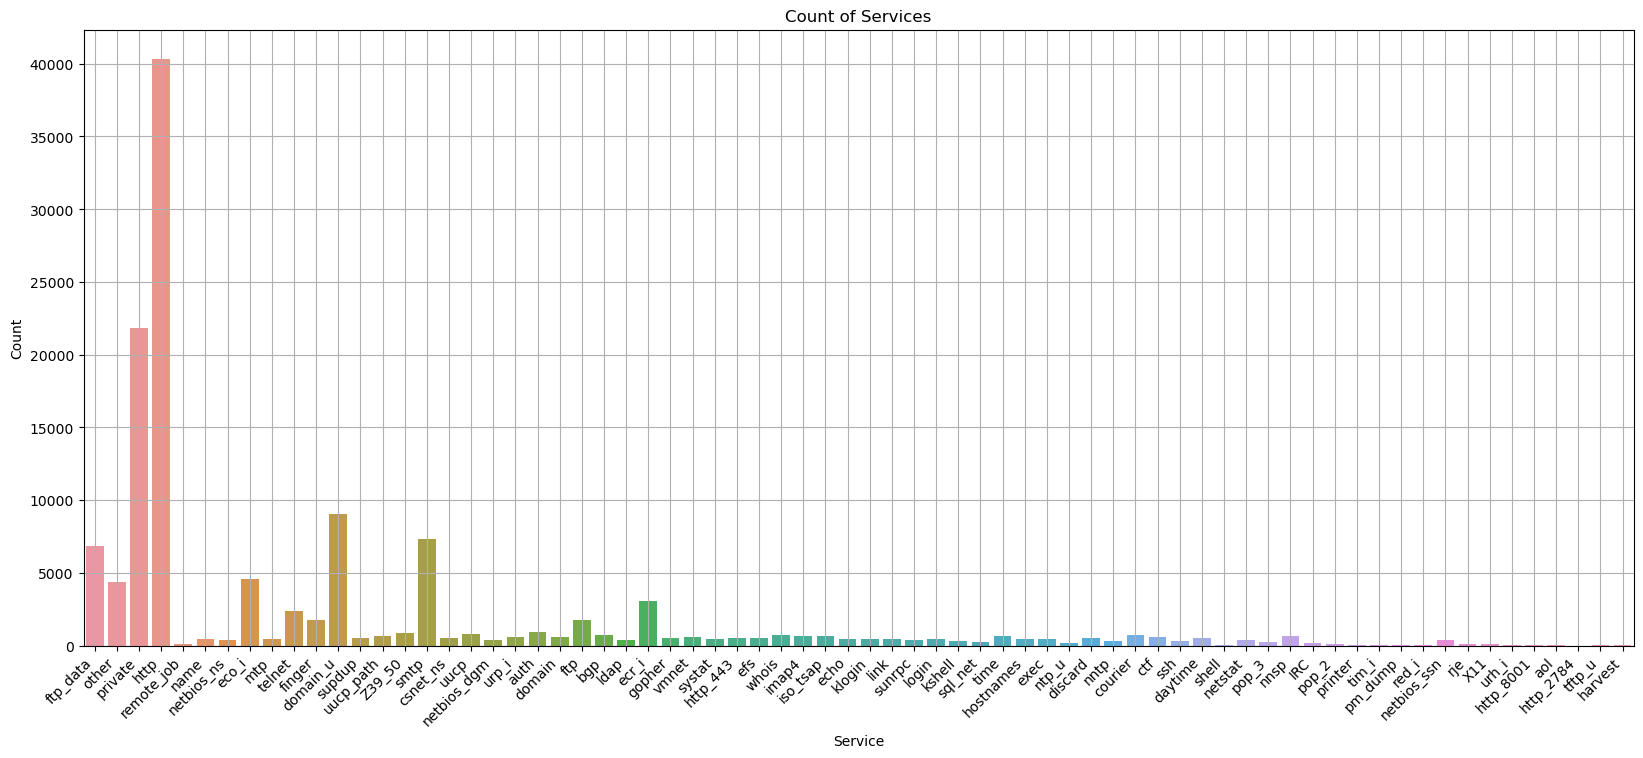

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

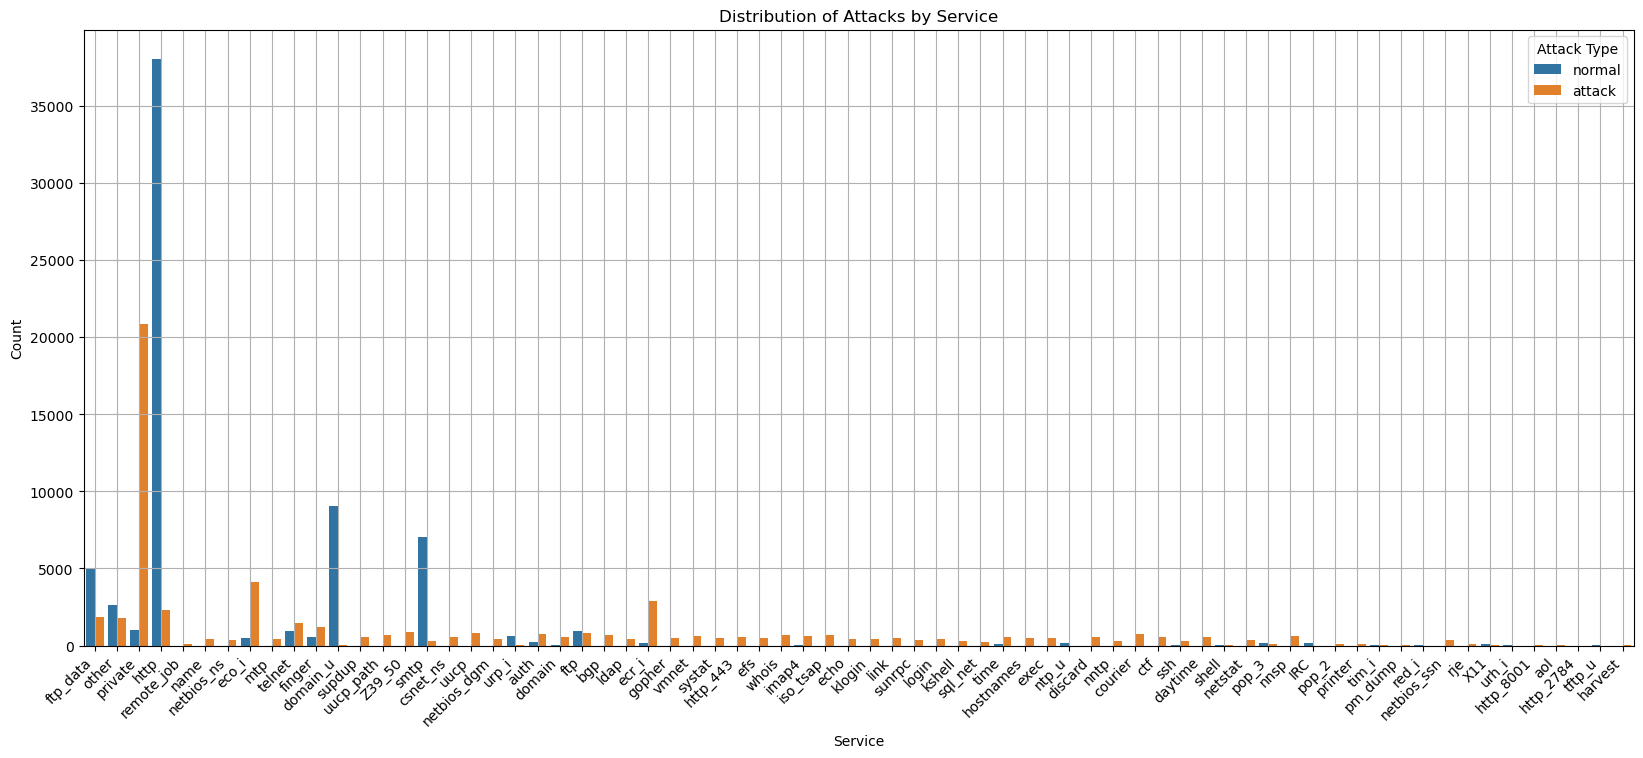

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='label', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

5. Kernel Density Estimate (KDE) plot of Duration by Flag

C:\Users\crist\AppData\Local\Temp\ipykernel_16164\1087274995.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(
C:\Users\crist\AppData\Local\Temp\ipykernel_16164\1087274995.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(
C:\Users\crist\AppData\Local\Temp\ipykernel_16164\1087274995.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(
C:\Users\crist\AppData\Local\Temp\ipykernel_16164\1087274995.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(
c:\Users\crist\miniconda3\envs\envTesi\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

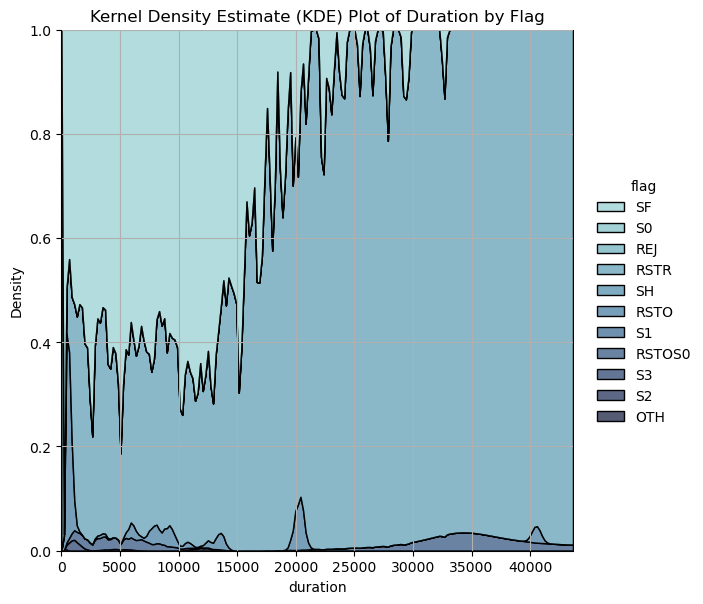

In [12]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

6. Distribution of attack types by Guest Login

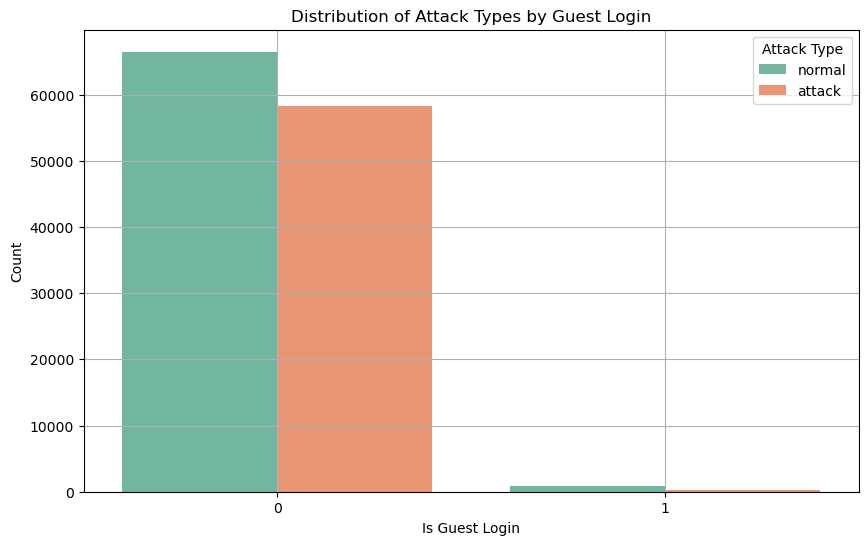

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='label', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

2. Grafici a barre per le feature categoriche

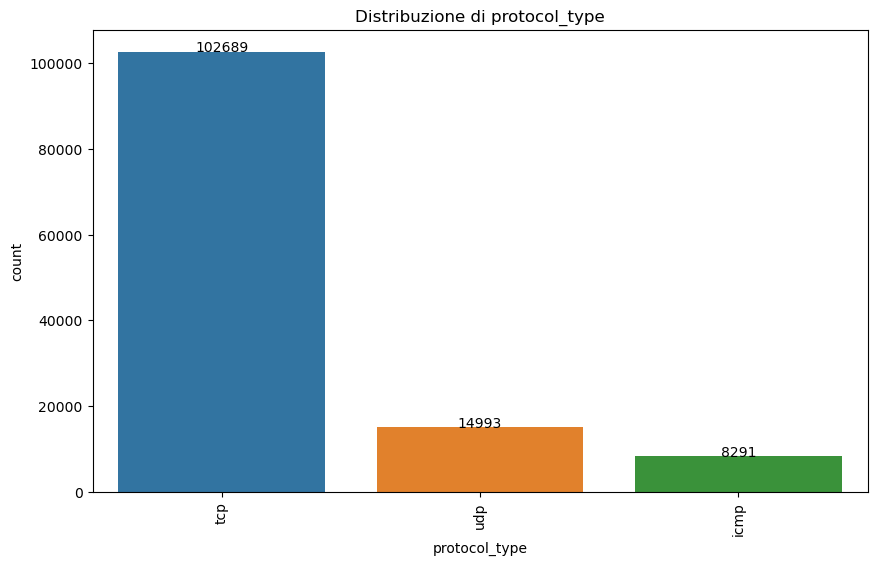

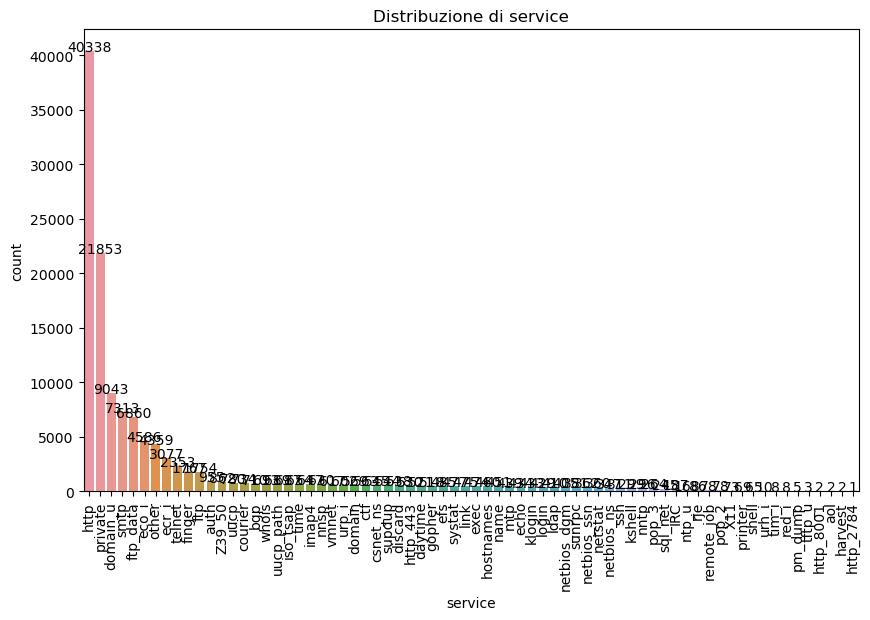

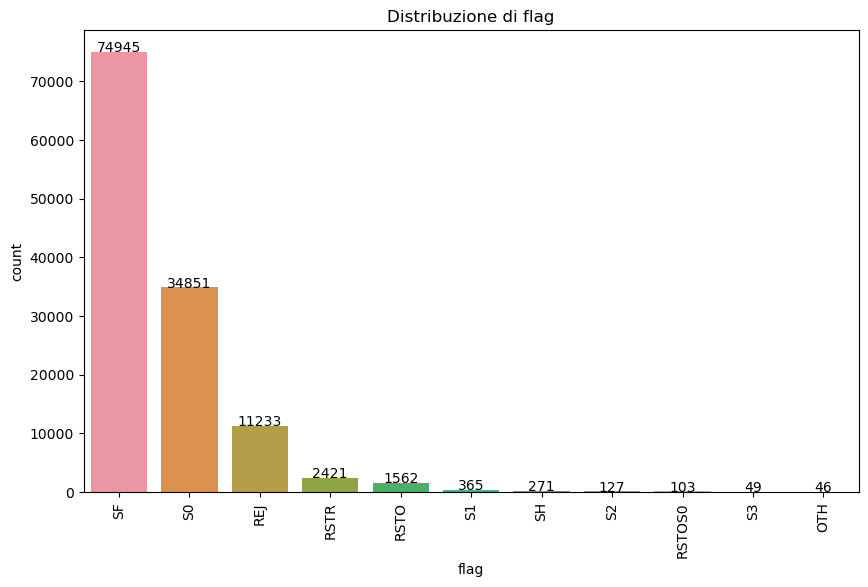

In [15]:
for feature in nominal_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, order = df[feature].value_counts().index)
    plt.title(f'Distribuzione di {feature}')
    plt.xticks(rotation=90)
    for i in range(len(df[feature].value_counts())):
        plt.text(i, df[feature].value_counts()[i], df[feature].value_counts()[i], ha = 'center')
    plt.show()


3. Grafico a barre per le feature binarie

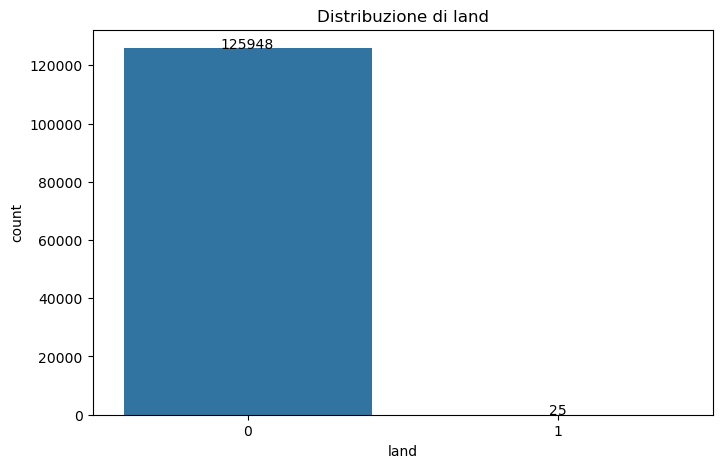

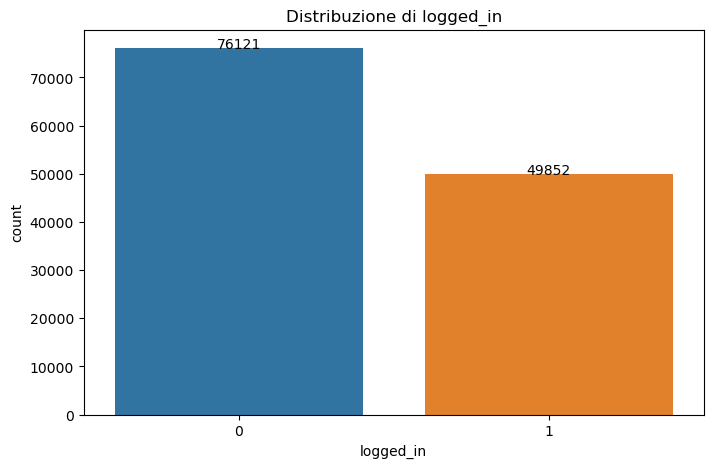

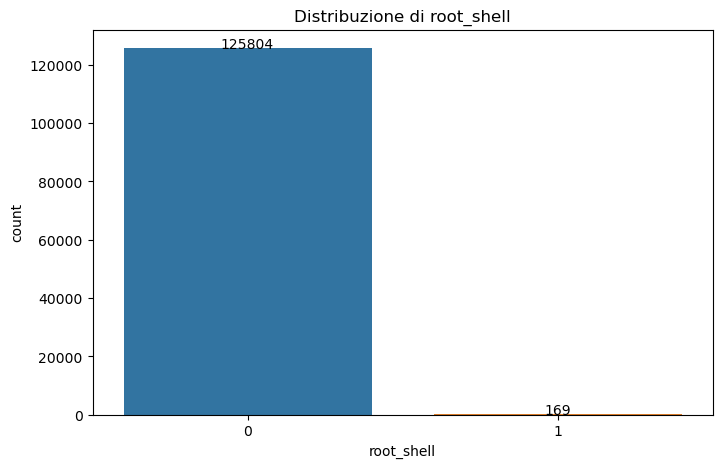

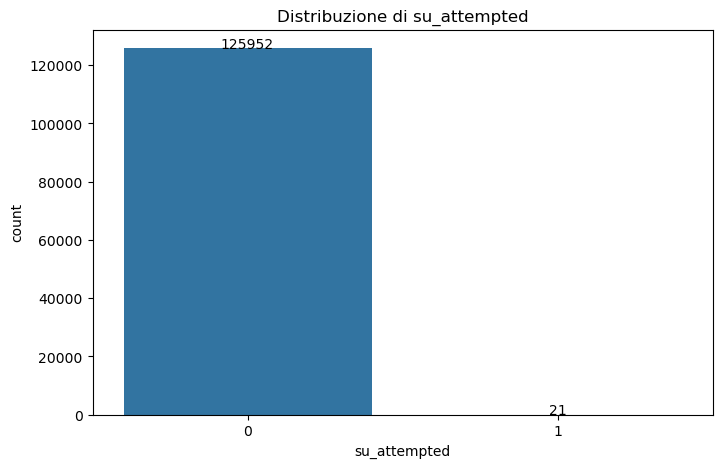

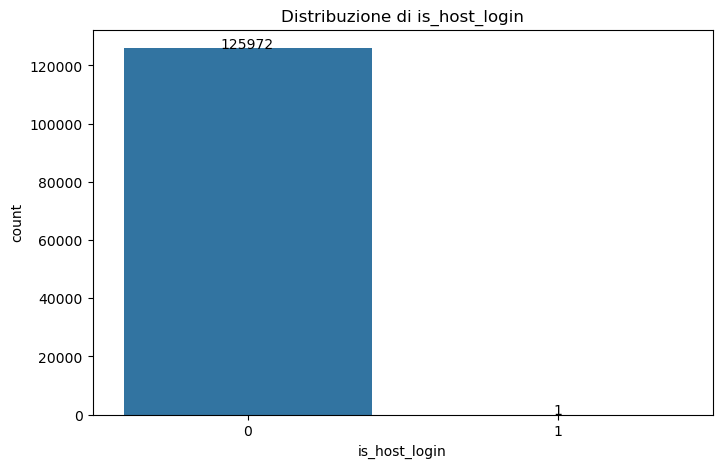

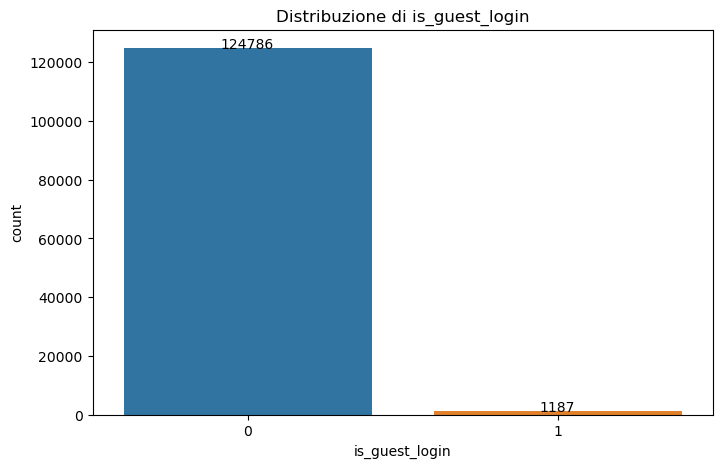

In [16]:
for feature in binary_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df, order = df[feature].value_counts().index)
    plt.title(f'Distribuzione di {feature}')
    for i in range(len(df[feature].value_counts())):
        plt.text(i, df[feature].value_counts()[i], df[feature].value_counts()[i], ha = 'center')
    plt.show()


5. Heatmap delle correlazioni

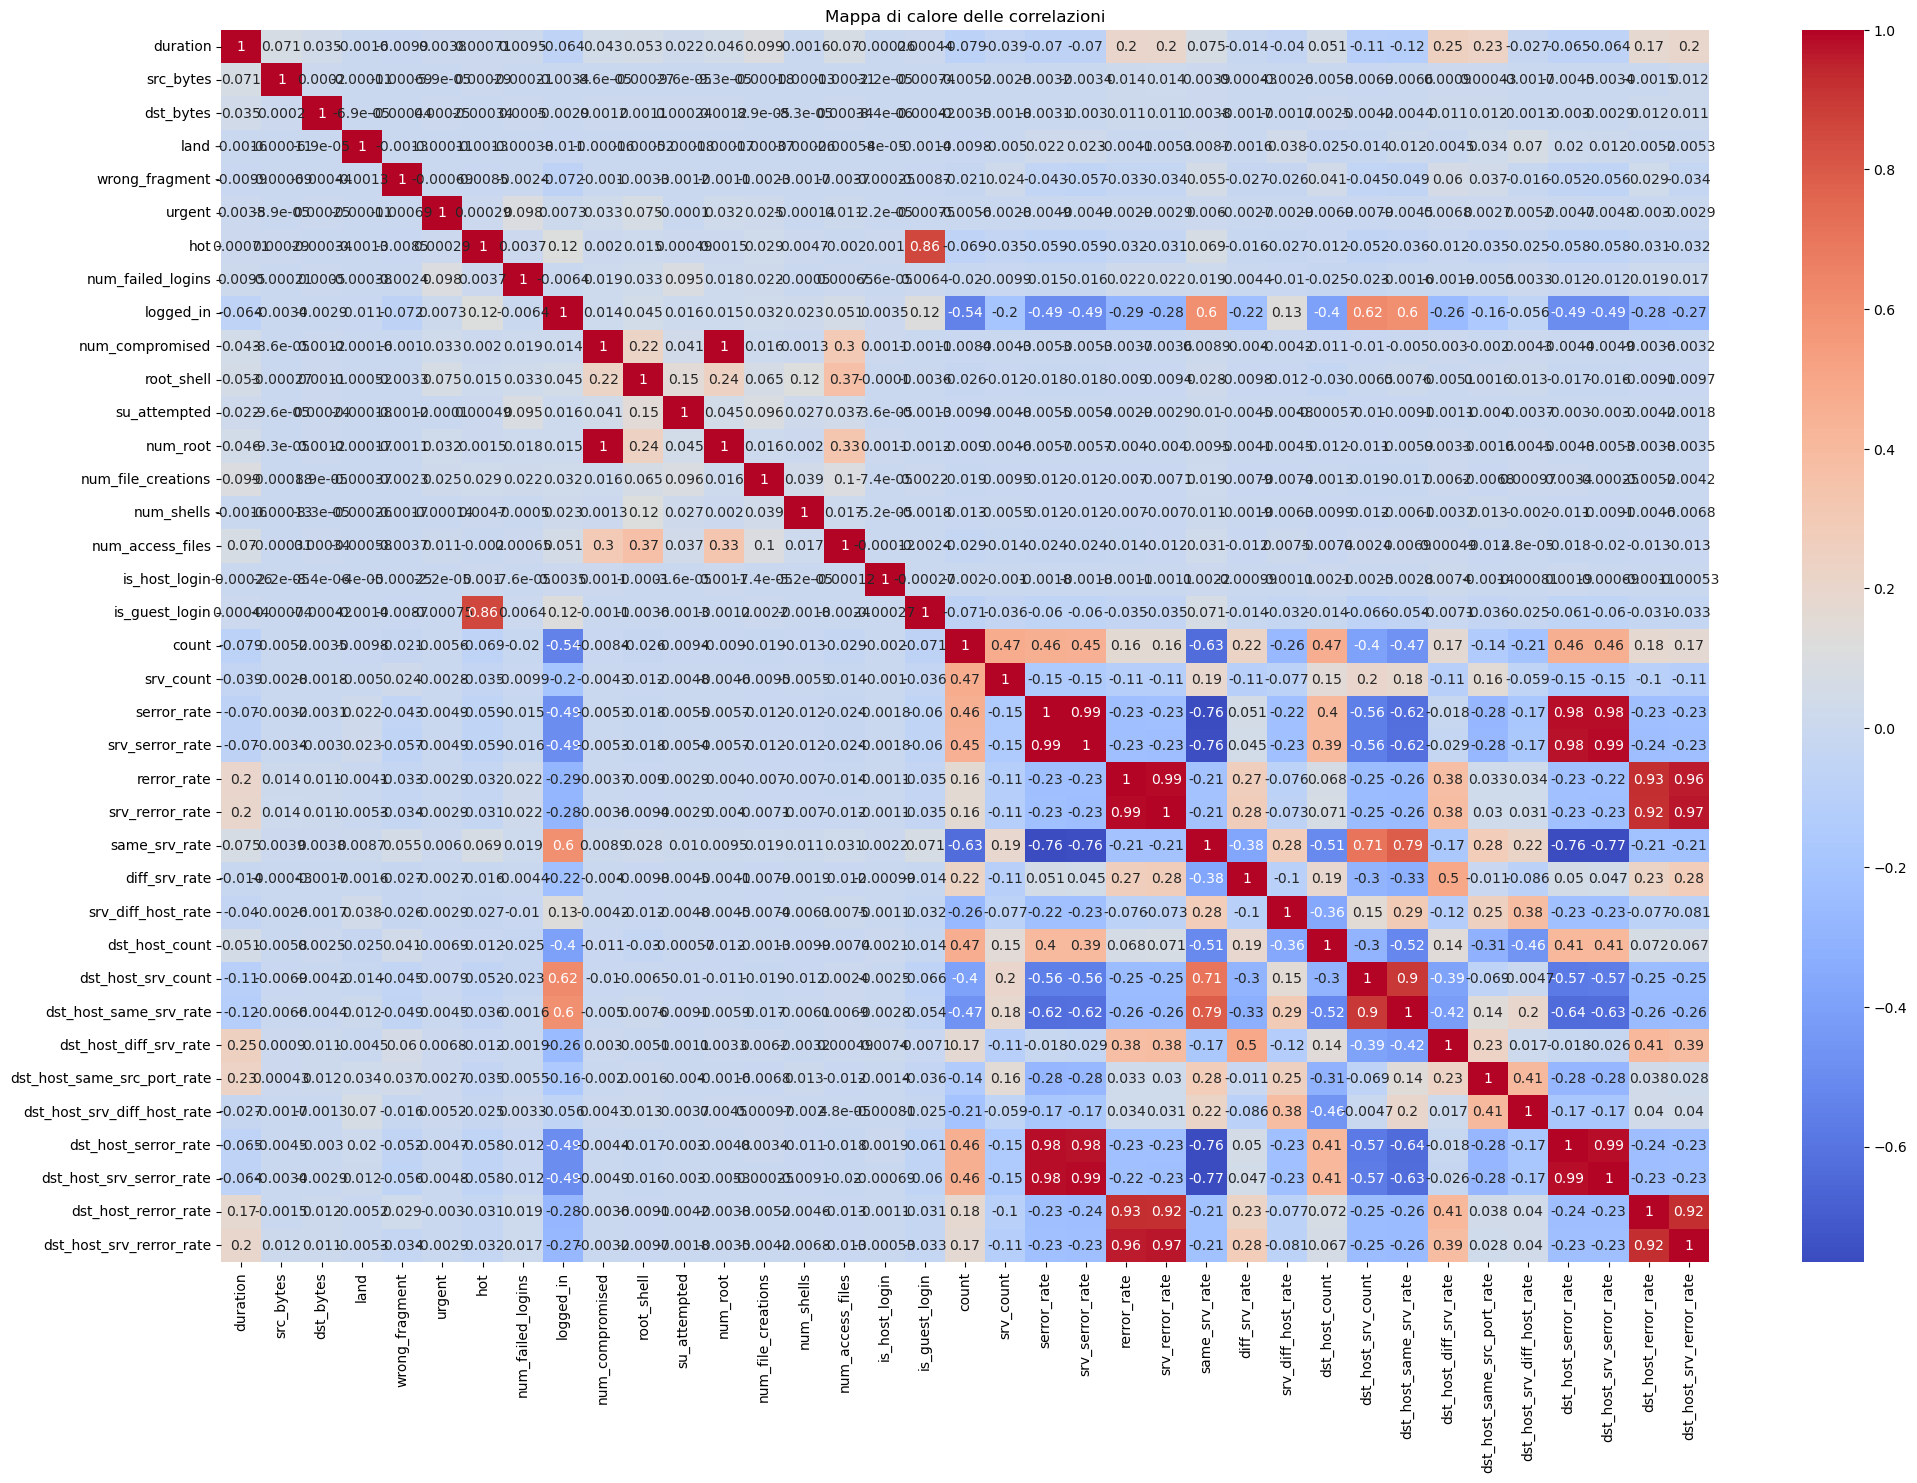

In [22]:
plt.figure(figsize=(24, 16))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mappa di calore delle correlazioni')
plt.show()